In [ ]:
%matplotlib inline

In [1]:
# my imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import imread, imshow

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

## Recognizing Handwritten digits

## The Digit Dataset

This dataset is made up of 1797 8x8 images. Each image, like the one shown below, is of a hand-written digit. In order to utilize an 8x8 figure like this, we’d have to first transform it into a feature vector with length 64.

The first 4 digits:

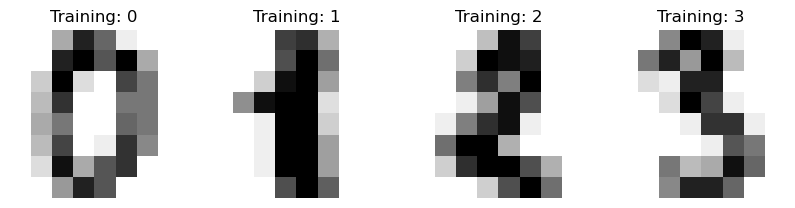

In [2]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [17]:
type(digits.images)

numpy.ndarray

In [21]:
len(digits.images[0])

8

In [22]:
first_digit = digits.images[0]

The data set is represented in 8 x 8 float matrices.

In [23]:
first_digit

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

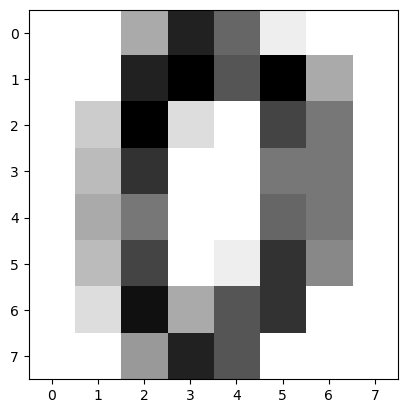

In [30]:
plt.imshow(first_digit, cmap='gray_r', interpolation="nearest")

In [27]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [28]:
len(digits.target)

1797

## Metrics

### Classification report
Build a text report showing the main classification metrics.
Text summary of the precision, recall, F1 score for each class.
The reported averages include macro average (averaging the unweighted mean per label), weighted average (averaging the support-weighted mean per label), and sample average (only for multilabel classification). Micro average (averaging the total true positives, false negatives and false positives) is only shown for multi-label or multi-class with a subset of classes, because it corresponds to accuracy otherwise and would be the same for all metrics.

```python
from sklearn.metrics import classification_report
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))
              precision    recall  f1-score   support

     class 0       0.50      1.00      0.67         1
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5

y_pred = [1, 1, 0]
y_true = [1, 1, 1]
print(classification_report(y_true, y_pred, labels=[1, 2, 3]))
              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

   micro avg       1.00      0.67      0.80         3
   macro avg       0.33      0.22      0.27         3
weighted avg       1.00      0.67      0.80         3
```

### Confusion matrix
The confusion_matrix function evaluates classification accuracy by computing the confusion matrix with each row corresponding to the true class (Wikipedia and other references may use different convention for axes).

By definition, entry i and j in a confusion matrix is the number of observations actually in group i, but predicted to be in group j.

```python
from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)
# >>> array([[2, 0, 0],
#            [0, 0, 1],
#            [1, 0, 2]])
```

![alt text](image.png)

## Support Vector Machines

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

1. The advantages of support vector machines are:

* Effective in high dimensional spaces.

* Still effective in cases where number of dimensions is greater than the number of samples.

* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

* Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

2. The disadvantages of support vector machines include:

* If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.

* SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation.

The support vector machines in scikit-learn support both dense (numpy.ndarray and convertible to that by numpy.asarray) and sparse (any scipy.sparse) sample vectors as input. However, to use an SVM to make predictions for sparse data, it must have been fit on such data. For optimal performance, use C-ordered numpy.ndarray (dense) or scipy.sparse.csr_matrix (sparse) with dtype=float64.

### Classification
SVC, NuSVC and LinearSVC are classes capable of performing binary and multi-class classification on a dataset.

SVC and NuSVC are similar methods, but accept slightly different sets of parameters and have different mathematical formulations. On the other hand, LinearSVC is another (faster) implementation of Support Vector Classification for the case of a linear kernel. It also lacks some of the attributes of SVC and NuSVC, like support_. LinearSVC uses squared_hinge loss and due to its implementation in liblinear it also regularizes the intercept, if considered. This effect can however be reduced by carefully fine tuning its intercept_scaling parameter, which allows the intercept term to have a different regularization behavior compared to the other features. The classification results and score can therefore differ from the other two classifiers.

As other classifiers, SVC, NuSVC and LinearSVC take as input two arrays: an array X of shape (n_samples, n_features) holding the training samples, and an array y of class labels (strings or integers), of shape (n_samples):

```python
from sklearn import svm
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC()
clf.fit(X, y)
#>>>SVC()
```

After being fitted, the model can then be used to predict new values:

```python
clf.predict([[2., 2.]])
#>>>array([1])
```

SVMs decision function depends on some subset of the training data, called the support vectors. Some properties of these support vectors can be found in attributes support_vectors_, support_ and n_support_:

```python
# get support vectors
clf.support_vectors_
#>>>array([[0., 0.],
       [1., 1.]])
# get indices of support vectors
clf.support_
#>>>array([0, 1]...)
# get number of support vectors for each class
clf.n_support_
#>>>array([1, 1]...)
```

### Sci-kit learn Model 

Tools for model selection, such as cross validation and hyper-parameter tuning.

### Train - Test Split
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation, next(ShuffleSplit().split(X, y)), and application to input data into a single call for splitting (and optionally subsampling) data into a one-liner.

Example:

```python
import numpy as np
from sklearn.model_selection import train_test_split
X, y = np.arange(10).reshape((5, 2)), range(5)
X
#>>>array([[0, 1],
#       [2, 3],
#       [4, 5],
#       [6, 7],
#       [8, 9]])
list(y)
#>>>[0, 1, 2, 3, 4]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

X_train
#>>>array([[4, 5],
#       [0, 1],
#       [6, 7]])
y_train
#>>>[2, 0, 3]
X_test
#>>>array([[2, 3],
#       [8, 9]])
y_test
#>>>[1, 4]
```

#### Significance of shuffle

```python
train_test_split(y, shuffle=False)
[[0, 1, 2], [3, 4]]
```